In [1]:
import nltk
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import re
import os
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.font_manager

In [2]:

nltk.download('punkt_tab')



[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/leocenturion/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [3]:
import io


In [4]:
tokenized_corpus = []
for file in os.listdir('./gutenberg_ebooks/'):
    with open(f'./gutenberg_ebooks/{file}', encoding="utf-8") as f:
        for line in f:
            cleaned_sentence = re.sub(r'[^\w\s]', '', line).lower()
            tokens = word_tokenize(cleaned_sentence, language='english')
            tokenized_corpus.append(tokens)


In [5]:
model = Word2Vec(
    sentences=tokenized_corpus,
    vector_size=25,  # Dimensionality of the word vectors
    window=10,         # Context window size
    min_count=1,      # Minimum word frequency
    workers=12,        # Number of threads to use (set to your core count)
    sg=0
)

In [7]:
similarity_king_queen = model.wv.similarity('king', 'queen')
similarity_king_queen

0.82099575

In [8]:
model.wv.most_similar('evolution', topn=5)

[('progression', 0.8947585821151733),
 ('repression', 0.8835926055908203),
 ('inversion', 0.8783217668533325),
 ('excitation', 0.8776395320892334),
 ('electrolytic', 0.8768057823181152)]

In [9]:
model.wv.most_similar('soul', topn=5)

[('mind', 0.8935612440109253),
 ('nature', 0.8693029880523682),
 ('intelligence', 0.8677243590354919),
 ('heart', 0.8595109581947327),
 ('spirit', 0.8491923213005066)]

In [10]:
model.wv.most_similar(positive=['man'], negative=['honor'], topn=5)

[('_manig_', 0.7476661205291748),
 ('key_', 0.72478848695755),
 ('wetime', 0.7004038691520691),
 ('conductorb', 0.6960381269454956),
 ('desvanecido', 0.6810216307640076)]

In [11]:
model.wv.similarity('man', 'superior')

0.5361534

In [12]:
model.wv.most_similar(positive=['superior'], topn=5)

[('inferior', 0.8741395473480225),
 ('ruling', 0.8096668720245361),
 ('spiritual', 0.8056595325469971),
 ('supreme', 0.8022550940513611),
 ('personal', 0.7915631532669067)]

In [13]:
model.wv.most_similar(positive=['government', 'vote'], topn=5)

[('covenant', 0.9008625149726868),
 ('admission', 0.8967700600624084),
 ('treaty', 0.8959665894508362),
 ('alliance', 0.8741931319236755),
 ('authority', 0.8710476160049438)]

In [14]:
model.wv.most_similar(positive=['government'], negative=['vote'], topn=5)

[('workin', 0.803756058216095),
 ('civilized', 0.7282466888427734),
 ('civilization', 0.6920186281204224),
 ('mesenterics', 0.6789389252662659),
 ('capable811', 0.6779670715332031)]

In [15]:
model.wv.most_similar(positive=['animal', 'rational'], topn=10)

[('finite', 0.8567092418670654),
 ('sensitive', 0.852538526058197),
 ('substantial', 0.8485475182533264),
 ('quality', 0.8337474465370178),
 ('element', 0.8267849087715149),
 ('immaterial', 0.8242918848991394),
 ('undivided', 0.8157826662063599),
 ('affinity', 0.7996261715888977),
 ('instinct', 0.798629879951477),
 ('substance', 0.7967497706413269)]

In [16]:
model.wv.most_similar(positive=['man'], topn=10)

[('woman', 0.8945556879043579),
 ('citizen', 0.8448512554168701),
 ('person', 0.8256551027297974),
 ('workman', 0.8189637660980225),
 ('creature', 0.8083547353744507),
 ('slave', 0.7789849638938904),
 ('deed', 0.7678898572921753),
 ('selfaccused', 0.767116904258728),
 ('thing', 0.7666612267494202),
 ('fortune', 0.7639452219009399)]

In [17]:
model.wv.most_similar('god', topn=10)

[('heaven', 0.8863197565078735),
 ('zeus', 0.8726857900619507),
 ('jove', 0.8395525217056274),
 ('gods', 0.8160310387611389),
 ('heavn', 0.8012691736221313),
 ('justice', 0.791684627532959),
 ('truth', 0.7753244042396545),
 ('divine', 0.7745051980018616),
 ('sovran', 0.7633399367332458),
 ('prometheus', 0.7618566751480103)]

In [18]:
model.wv.most_similar('jesus', topn=10)

[('christ', 0.8483758568763733),
 ('mahomet', 0.8272493481636047),
 ('moses', 0.8191419243812561),
 ('abraham', 0.8054323196411133),
 ('dionysius', 0.7928140759468079),
 ('gospel', 0.7726422548294067),
 ('athanasius', 0.7629269957542419),
 ('theodosius', 0.7604589462280273),
 ('contravention', 0.7513666749000549),
 ('peter', 0.7492272853851318)]

In [19]:
model.wv.most_similar(positive=['athens'], topn=5)

[('sparta', 0.959345817565918),
 ('rome', 0.951134204864502),
 ('lacedaemon', 0.8999408483505249),
 ('antioch', 0.8980553150177002),
 ('italy', 0.8879421949386597)]

In [20]:
model.wv.most_similar(positive=['caesar'], topn=5)

[('pompey', 0.9257498383522034),
 ('brutus', 0.8901711702346802),
 ('crassus', 0.8879533410072327),
 ('antony', 0.8874254822731018),
 ('emperor', 0.8830015659332275)]

In [21]:
model.wv.most_similar(positive=['philosophy'], topn=5)

[('theology', 0.8870297074317932),
 ('science', 0.878290593624115),
 ('morality', 0.8716159462928772),
 ('plato', 0.8432615399360657),
 ('politics', 0.8422377109527588)]

In [22]:
model.wv.similarity('god', 'son')

0.5441056

In [23]:
model.wv.index_to_key

['the',
 'of',
 'and',
 'to',
 'in',
 'a',
 'that',
 'is',
 'his',
 'with',
 'i',
 'it',
 'as',
 'he',
 'not',
 'for',
 'by',
 'be',
 'which',
 'but',
 'or',
 'this',
 'was',
 'from',
 'they',
 'all',
 'are',
 'on',
 'have',
 'you',
 'at',
 'their',
 'so',
 'him',
 'my',
 'we',
 'who',
 'had',
 'them',
 'if',
 'one',
 'what',
 'no',
 'will',
 'were',
 'me',
 'her',
 'an',
 'when',
 'more',
 'there',
 'can',
 'other',
 'then',
 'may',
 'would',
 'our',
 'any',
 'now',
 'these',
 'thou',
 'has',
 'man',
 'such',
 'some',
 'than',
 'do',
 'been',
 'thy',
 'she',
 'only',
 'into',
 'those',
 'shall',
 'first',
 'us',
 'your',
 'upon',
 'its',
 'said',
 'must',
 'should',
 'god',
 'yet',
 'great',
 'out',
 'most',
 'how',
 'same',
 'good',
 'thee',
 'time',
 'men',
 'being',
 'own',
 'very',
 'like',
 'thus',
 'things',
 'nor',
 'two',
 'where',
 'without',
 'up',
 'much',
 'see',
 'before',
 'made',
 'many',
 'could',
 'though',
 'after',
 'project',
 'well',
 'de',
 'also',
 'himself',
 '

In [24]:
labels = list(model.wv.index_to_key)
vectors = model.wv.vectors

tsne_model = TSNE(
    n_components=2,
    random_state=42,
    perplexity=30,
    n_iter=250,
    init='pca',
    learning_rate='auto',
    n_jobs=12

)

new_values = tsne_model.fit_transform(vectors)

KeyboardInterrupt: 

In [25]:

def plot_with_tsne(model, words_to_plot=None, perplexity=30, n_iter=1000, random_state=42):
    return
def plot()
    x = [value[0] for value in new_values]
    y = [value[1] for value in new_values]

    plt.figure(figsize=(16, 10))
    for i in range(len(x)):
        plt.scatter(x[i], y[i])
        try:
            plt.annotate(
                labels[i],
                xy=(x[i], y[i]),
                xytext=(5, 2),
                textcoords='offset points',
                ha='right',
                va='bottom',
                fontproperties=matplotlib.font_manager.FontProperties(size=10)
            )
        except Exception:
            plt.annotate(
                labels[i],
                xy=(x[i], y[i]),
                xytext=(5, 2),
                textcoords='offset points',
                ha='right',
                va='bottom'
            )

    plt.title(f"t-SNE visualization (Perplexity: {effective_perplexity})")
    plt.xlabel("t-SNE Component 1")
    plt.ylabel("t-SNE Component 2")
    plt.grid(True)
    plt.show()


SyntaxError: invalid syntax (4070743486.py, line 3)

In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
transformed = pca.fit_transform(model.wv.vectors)

In [33]:
def plot_related_words(vectors, model, root):
    plt.scatter(vectors[0], vectors[1])

    similar_words = [word for word, cos in model.wv.most_similar(positive=[root], topn=5)]
    coords = transformed[model.wv.get_index(root)]
    plt.scatter(coords[0], coords[1], color='yellow')
    for similar in similar_words:
        coords = transformed[model.wv.get_index(similar)]
        plt.scatter(coords[0], coords[1], color='red')
    plt.show()

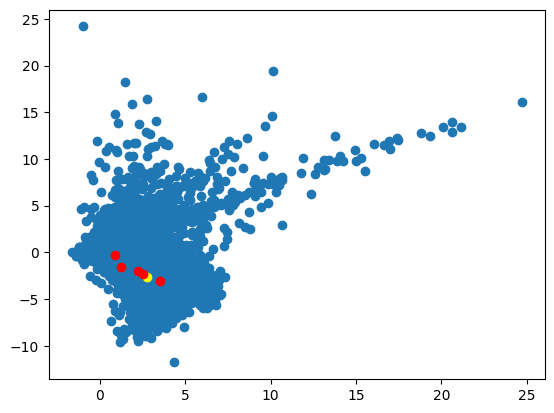

In [34]:
plot_related_words(transformed.T, model, 'caesar')

In [28]:
transformed.T[0]

array([ 2.0799637 ,  2.0952625 ,  2.039838  , ..., -0.25468898,
       -0.18591455, -0.26804474], dtype=float32)